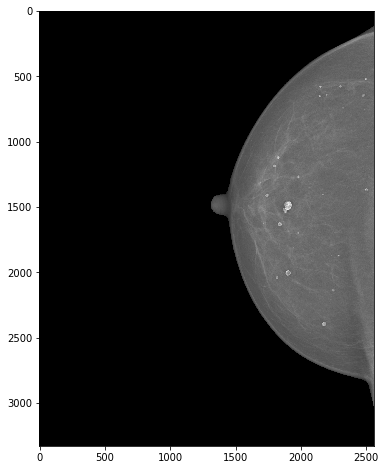

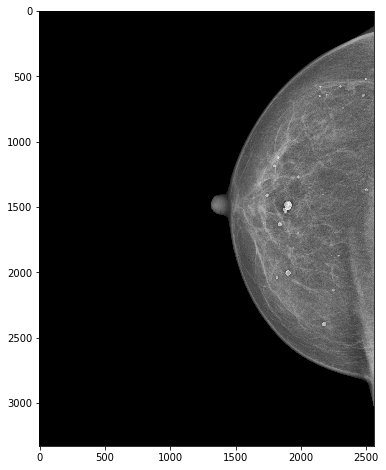

In [15]:
%matplotlib inline
import preprocessing
import cv2
import matplotlib.pyplot as plt
import time 
import numpy


img_ori = cv2.imread('mammo3.tif',0)
img_clahe = preprocessing.clahe(img_ori,2,(8,8))
#cv2.imwrite('ss.jpg',img)
plt.figure(figsize=(8,8))
plt.imshow(img_ori, cmap='gray')
plt.figure(figsize=(8,8))
plt.imshow(img_clahe, cmap='gray')


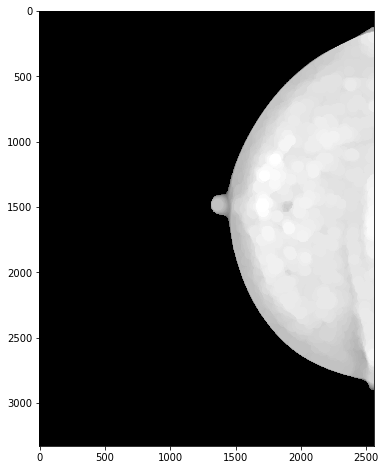

In [18]:
# Morphological reconstruction

marker = cv2.morphologyEx(img_ori, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80,80)))
plt.figure(figsize=(8,8))
plt.imshow(marker, cmap='gray')



In [19]:
marker_prev = 0
it = 0
while cv2.countNonZero(marker - marker_prev) > 0:
    marker_prev = marker.copy()
    start = time.time()
    # geodesic dilation
    marker = cv2.morphologyEx(marker, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)))
    marker = cv2.min(marker, img_ori)
    it = it + 1

print(time.time()-start)


0.03125262260437012


1232


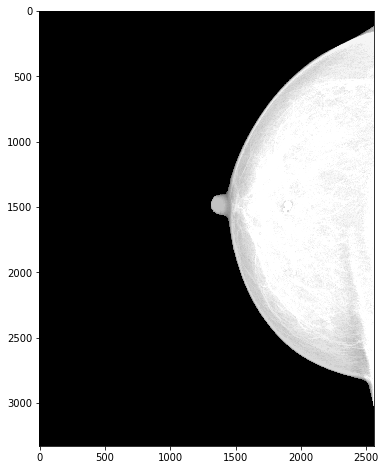

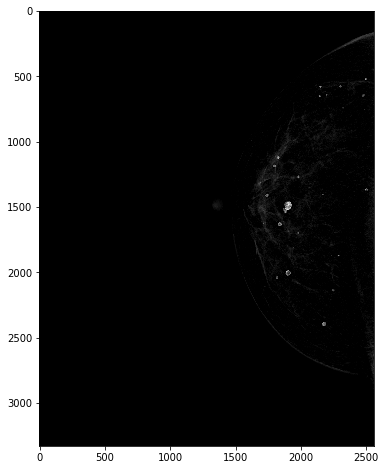

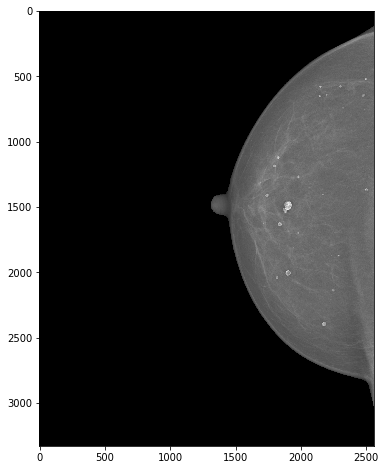

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(marker, cmap='gray')
print (it)

plt.figure(figsize=(8,8))
plt.imshow(img_ori - marker, cmap='gray')  

plt.figure(figsize=(8,8))
plt.imshow(img_ori, cmap='gray') 

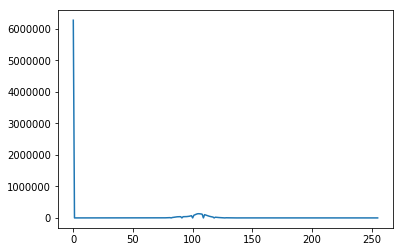

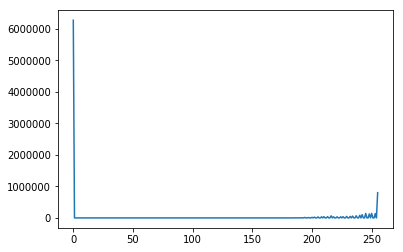

In [21]:
bins, bins_c = numpy.histogram(img_ori, 256)
plt.figure()
plt.plot(bins)

bins, bins_c = numpy.histogram(marker, 256)
plt.figure()
plt.plot(bins)

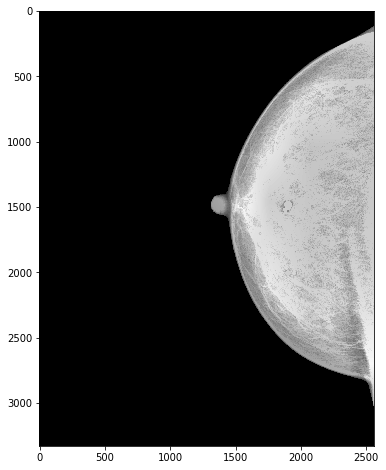

In [22]:
img_clahe = preprocessing.clahe(marker,2,(8,8))
plt.figure(figsize=(8,8))
plt.imshow(img_clahe, cmap='gray')